## Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from math import sqrt

## Read and select data

In [2]:
#Dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
df = pd.read_csv (url)

df_euro = df [(df['continent'].isin(['Europe','Americas']))&(df['year']==2007)].copy()
features = ['gdpPercap','lifeExp','pop']
countries = df_euro['country'].values
X = df_euro[features].values

df_euro.head()

,country,year,pop,continent,lifeExp,gdpPercap
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640
83,Austria,2007,8199783.0,Europe,79.829,36126.492700
119,Belgium,2007,10392226.0,Europe,79.441,33692.605080
143,Bolivia,2007,9119152.0,Americas,65.554,3822.137084


## Normalize data

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Ward Method

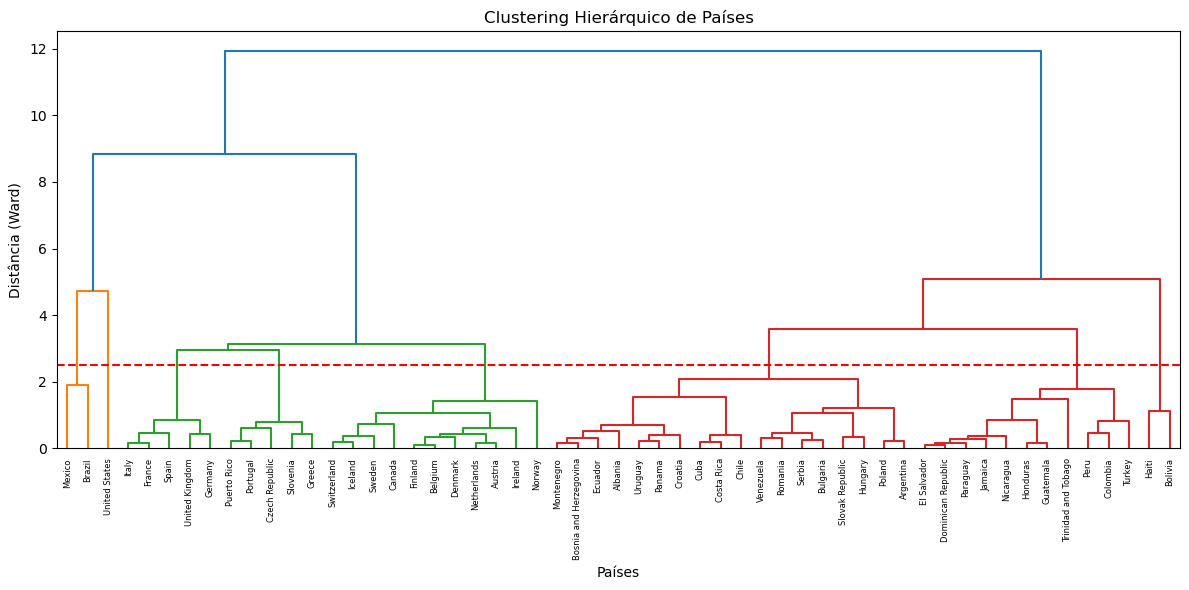

In [4]:
#Apply hierarchical clustering
linked = linkage(X_scaled, method='ward')

#Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           labels=df_euro['country'].tolist(),
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.axhline(y=2.5, color='r', linestyle='--')
plt.title('Clustering Hierárquico de Países')
plt.xlabel('Países')
plt.ylabel('Distância (Ward)')
plt.tight_layout()
plt.show()

## Elbow method

c:\Users\anacs\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\anacs\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\anacs\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\anacs\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\anacs\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi

O melhor K é: 9


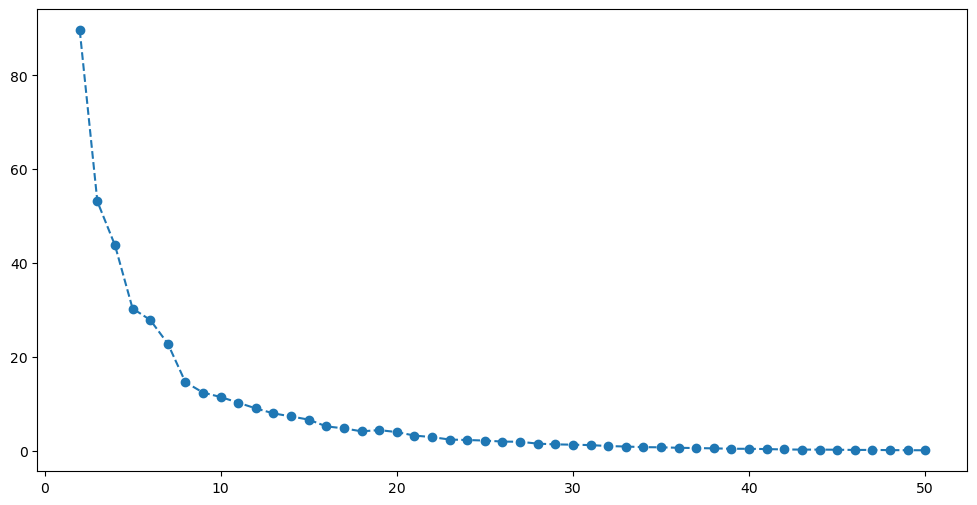

In [5]:
#Elbow method
wcss = []
for n in range(2, 51):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plot = plt.figure(figsize=(12, 6))
plt.plot(range(2, 51), wcss, marker='o', linestyle='--')


x1, y1 = 2, wcss[0]
x2, y2 = 50, wcss[len(wcss)-1]

distances = []
for i in range(len(wcss)):
    x0 = i+2
    y0 = wcss[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator/denominator)

print(f'O melhor K é:',distances.index(max(distances)) + 2)

## KMeans

In [6]:
#Apply K-means clustering
kmeans = KMeans(n_clusters=9, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

c:\Users\anacs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Convergiu em 3 iterações.
Inércia final: 12.73

Grupo 1:
['France' 'Germany' 'Italy' 'Spain' 'United Kingdom']

Grupo 2:
['Albania' 'Argentina' 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia'
 'Ecuador' 'Hungary' 'Montenegro' 'Panama' 'Poland' 'Serbia'
 'Slovak Republic' 'Uruguay' 'Venezuela']

Grupo 3:
['Brazil']

Grupo 4:
['Austria' 'Belgium' 'Canada' 'Denmark' 'Finland' 'Greece' 'Iceland'
 'Ireland' 'Netherlands' 'Norway' 'Sweden' 'Switzerland']

Grupo 5:
['Bolivia' 'Haiti']

Grupo 6:
['Chile' 'Costa Rica' 'Cuba' 'Czech Republic' 'Portugal' 'Puerto Rico'
 'Slovenia']

Grupo 7:
['Colombia' 'Dominican Republic' 'El Salvador' 'Guatemala' 'Honduras'
 'Jamaica' 'Nicaragua' 'Paraguay' 'Peru' 'Romania' 'Trinidad and Tobago'
 'Turkey']

Grupo 8:
['United States']

Grupo 9:
['Mexico']


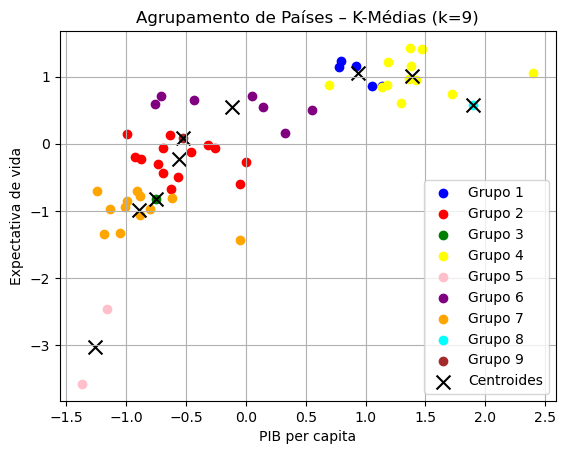

Centroides (mm):
Grupo 1: (0.9, 1.1)
Grupo 2: (-0.6, -0.2)
Grupo 3: (-0.8, -0.8)
Grupo 4: (1.4, 1.0)
Grupo 5: (-1.3, -3.0)
Grupo 6: (-0.1, 0.6)
Grupo 7: (-0.9, -1.0)
Grupo 8: (1.9, 0.6)
Grupo 9: (-0.5, 0.1)


In [7]:
#Verification
print(f"\nConvergiu em {kmeans.n_iter_} iterações.")
print(f"Inércia final: {kmeans.inertia_:.2f}")


#List countries in each cluster
df_euro['Grupo'] = labels
for i in range(9):
    print(f"\nGrupo {i+1}:")
    # Filtra os países cuja coluna 'Grupo' seja igual a i
    print(df_euro[df_euro['Grupo'] == i]['country'].values)

#Plot clusters
colors = ['blue', 'red', 'green', 'yellow', 'pink', 'purple', 'orange', 'cyan','brown']
for i in range(9):
    plt.scatter(X_scaled[labels==i,0], X_scaled[labels==i,1],
                color=colors[i], label=f'Grupo {i+1}')
plt.scatter(centroids[:,0], centroids[:,1],
            color='black', marker='x', s=100, label='Centroides')
plt.xlabel('PIB per capita')
plt.ylabel('Expectativa de vida')
plt.title('Agrupamento de Países – K-Médias (k=9)')
plt.legend()
plt.grid(True)
plt.show()

#Final centroids
print("Centroides (mm):")
for i, centro in enumerate(centroids):
    print(f"Grupo {i+1}: ({centro[0]:.1f}, {centro[1]:.1f})")